In [16]:
'''Ellen Wynn Machine Learning 2 Final Project
This project attempts to classify brain MRI images as having tumors or no tumors.'''
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [17]:
!unzip 'Tumor_Data.zip'
main_folder = 'Tumor_Data/'

Archive:  Tumor_Data.zip
replace Tumor_Data/no_tumor/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

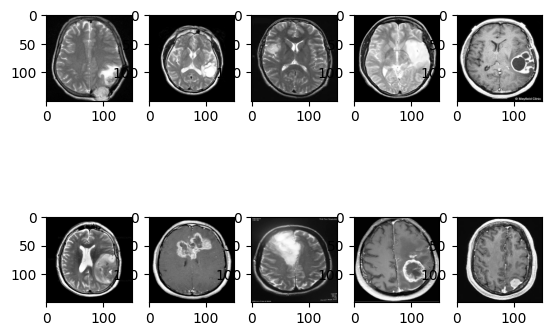

In [18]:
images = []
labels = []
SIZE = 150

#append data and labels for yes_tumor (positive) images into arrays, label 1
yes_folder = os.listdir(main_folder + 'yes_tumor/')
for i, image_name in enumerate(yes_folder):
  if (image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(main_folder + 'yes_tumor/' + image_name, 0) #0 loads image in grayscale
    image = cv2.resize(image, (SIZE, SIZE), interpolation = cv2.INTER_AREA)
    images.append(np.array(image))
    labels.append(1)

#append for no_tumor (negative) images into arrays, label 0
no_folder = os.listdir(main_folder + 'no_tumor/')
for i, image_name in enumerate(no_folder):
  if (image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(main_folder + 'no_tumor/' + image_name, 0)
    image = cv2.resize(image, (SIZE, SIZE), interpolation = cv2.INTER_AREA)
    images.append(np.array(image))
    labels.append(0)

images = np.array(images)
labels = np.array(labels)

fig, axarr = plt.subplots(2,5)

for i in range(5):
    axarr[0, i].imshow(images[i], cmap=plt.cm.Greys_r)
    axarr[1, i].imshow(images[i+5], cmap=plt.cm.Greys_r)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# split data into test and training
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size =0.2, random_state =None, shuffle=None)

from keras.utils import normalize

#rescale (normalize) data so that values are between 0 and 1
x_train = normalize(x_train, axis = 1)
x_test = normalize(x_test, axis = 1)


In [20]:
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, Activation, Dropout, Flatten, MaxPooling2D, BatchNormalization, Dense

INPUT_SHAPE = (SIZE, SIZE, 1)

model = keras.Sequential()
#layer 1
model.add(Conv2D(32, (3, 3), input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 2
#maybe try kernel initizlizer (to initialize the weights)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 3
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 4
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
#sigmoid best for binary classification
#only use softmax for exclusive classification
model.add(Activation('sigmoid'))

In [21]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy']) #use this bc analyzing images

#train model. choose epochs, find loss and accuracy

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
3/3 [==============================] - 8s 2s/step - loss: 0.6928 - accuracy: 0.5147 - val_loss: 0.6950 - val_accuracy: 0.4706
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 0.6973 - accuracy: 0.5294 - val_loss: 0.6915 - val_accuracy: 0.4706
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.6920 - accuracy: 0.5147 - val_loss: 0.6908 - val_accuracy: 0.4706
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 0.6926 - accuracy: 0.4559 - val_loss: 0.6893 - val_accuracy: 0.7941
Epoch 5/10
3/3 [==============================] - 4s 998ms/step - loss: 0.6874 - accuracy: 0.6544 - val_loss: 0.6848 - val_accuracy: 0.4706
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 0.6902 - accuracy: 0.5368 - val_loss: 0.6852 - val_accuracy: 0.8529
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.6857 - accuracy: 0.6397 - val_loss: 0.6780 - val_accuracy: 0.8529
Epoch 8/10
3/3 [======================